In [ ]:
from tensorflow.keras.layers import Dense, SimpleRNN, RNN, GRU, Input,LSTM
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X=np.sin(np.arange(50)*0.1)+np.random.randn(50)*0.1
X=X.reshape(50,1)
X=np.array((X,X,X,X,X,X,X,X,X,X))

In [ ]:
X=X.reshape(500,1)

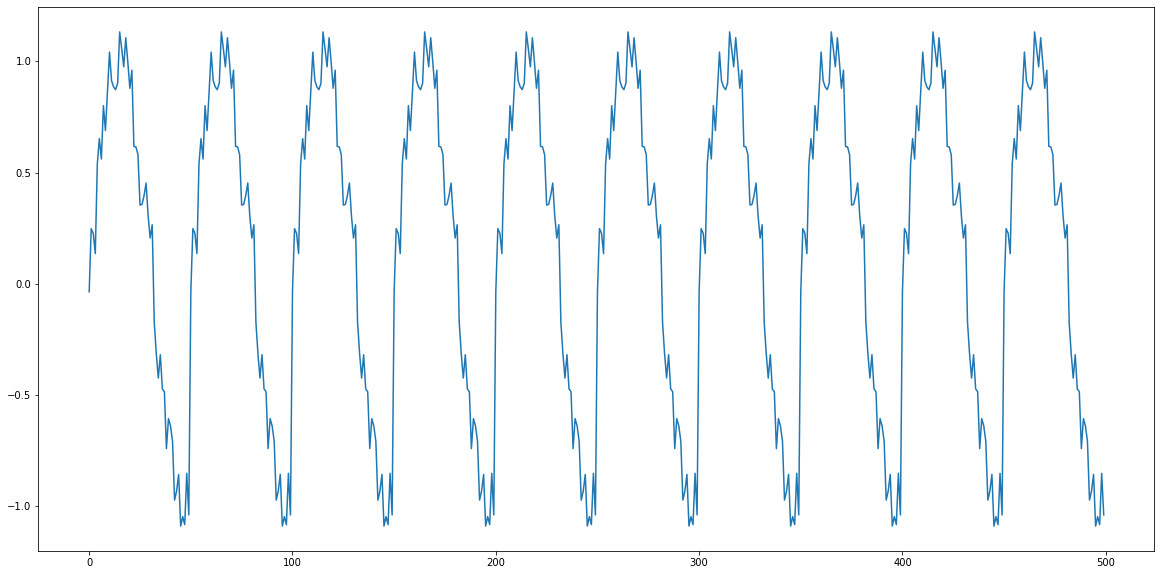

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(X)

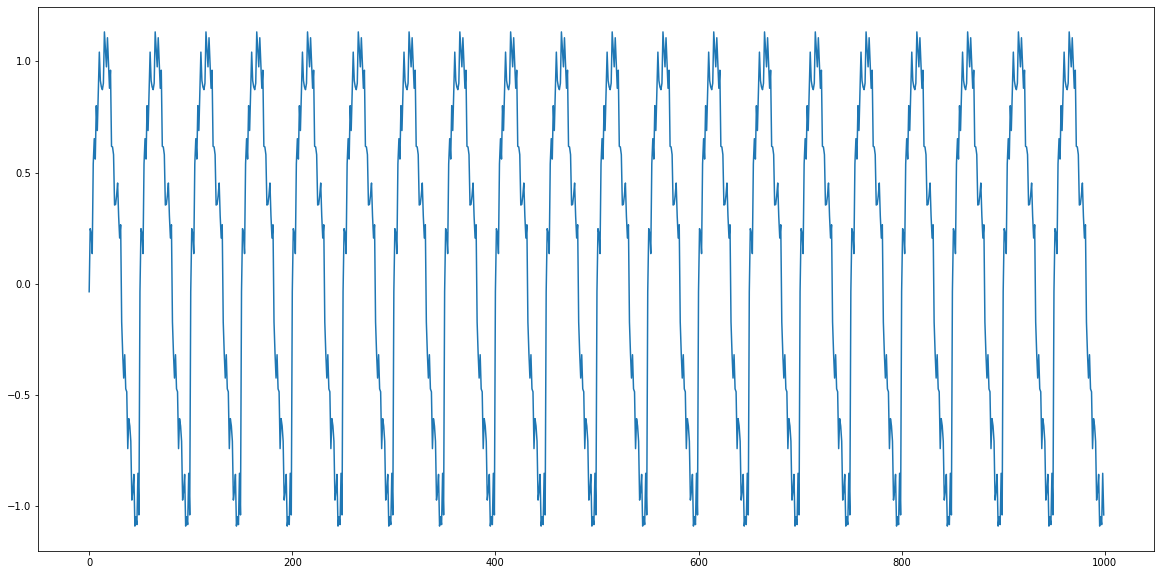

In [ ]:
X=np.array((X,X))
X=X.reshape(1000,1)
plt.figure(figsize=(20,10))
plt.plot(X)

In [ ]:
X_test=[];k=0
for i in range(len(X)//50):
  k=i*50
  x=X[k:k+50]+i*0.1
  X_test.append(x)
X_test=np.array(X_test)
X_test=X_test.reshape(1000,1)


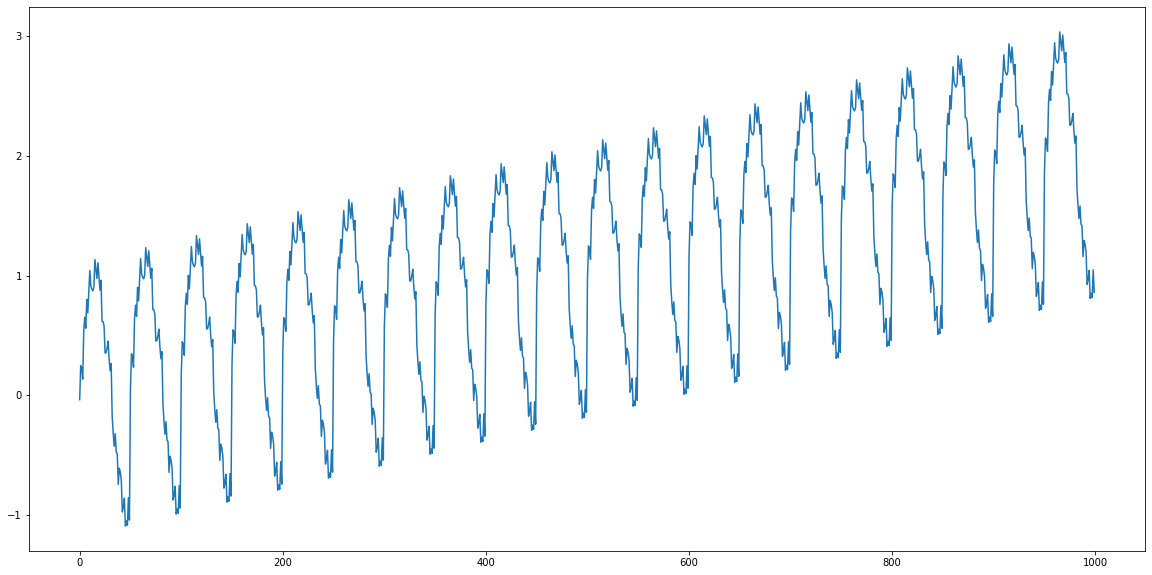

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(X_test)

In [ ]:
X_test.shape

(1000, 1)

In [ ]:
X=X_test.reshape(-1,10,1)

In [ ]:
T=50;Y=[];X=[]
for t in range(len(X_test) - T):
  x = X_test[t:t+T]
  X.append(x)
  y = X_test[t+T]
  Y.append(y)
X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)

In [ ]:
i=Input(shape=(T,1))
x=LSTM(50,activation="tanh")(i)
#x=Dense(8,activation="relu")(x)
x=Dense(1,activation=None)(x)
model = Model(i,x)
model.compile(loss = "mse",optimizer = "adam")
r=model.fit(X,Y,
          epochs=1000)



Epoch 1/1000
30/30 [==============================] - 1s 21ms/step - loss: 0.5609
Epoch 2/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.1733
Epoch 3/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.1024
Epoch 4/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0887
Epoch 5/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0802
Epoch 6/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0734
Epoch 7/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0661
Epoch 8/1000
30/30 [==============================] - 1s 21ms/step - loss: 0.0591
Epoch 9/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0568
Epoch 10/1000
30/30 [==============================] - 1s 21ms/step - loss: 0.0477
Epoch 11/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0459
Epoch 12/1000
30/30 [==============================] - 1s 21ms/step - loss: 0.0417
Epoch 13/1000

<function matplotlib.pyplot.legend>

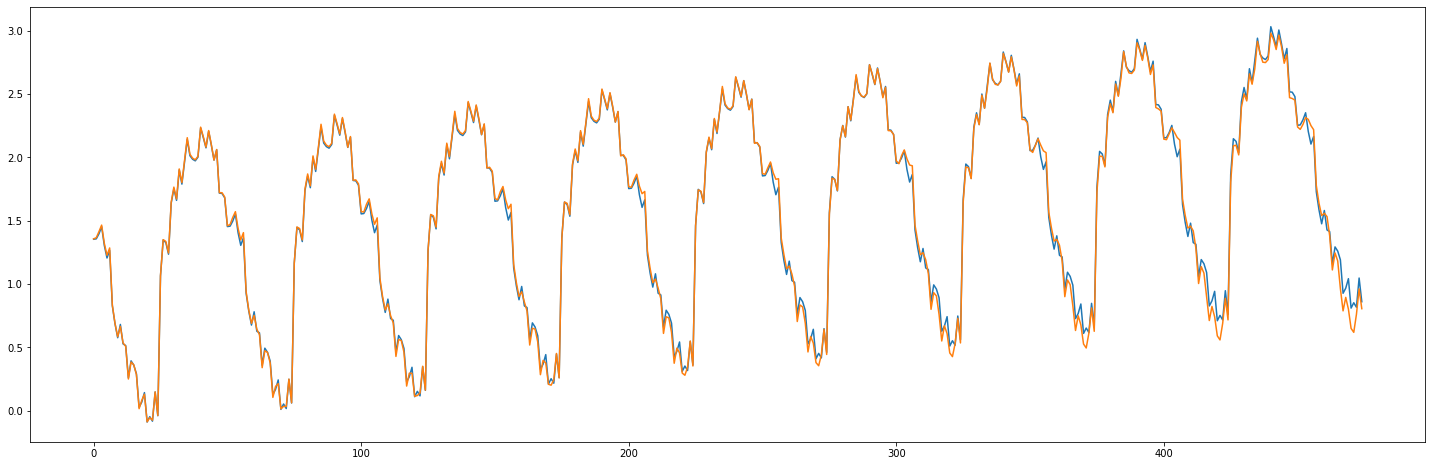

In [ ]:
plt.figure(figsize=(25,8))
validation_target=Y[-N//2:]
loss_x=X[-N//2]
validation_prediction=[]
while len(validation_prediction)<len(validation_target):
  p=model.predict(loss_x.reshape(1,-1))[0][0]
  loss_x=np.roll(loss_x,-1)
  validation_prediction.append(p)
  loss_x[-1]=p
plt.plot(validation_target,label="forecast target")
plt.plot(validation_prediction,label="validation_prediction")
plt.legend

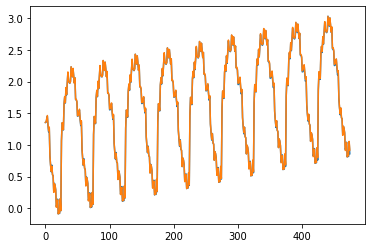

In [ ]:
validation_target=Y[-N//2:]
i=-N//2
validation_prediction=[]
while len(validation_prediction)<len(validation_target):
  p=model.predict(X[i].reshape(1,-1))[0][0]
  i=i+1
  validation_prediction.append(p)
plt.plot(validation_target,label="forecast target")
plt.plot(validation_prediction,label="validation_prediction")

In [ ]:
plt.figure(figsize=(25,8))
loss_x=X[949]
validation_prediction=[]
while len(validation_prediction)<500:
  p=model.predict(loss_x.reshape(1,-1))[0][0]
  loss_x=np.roll(loss_x,-1)
  validation_prediction.append(p)
  loss_x[-1]=p
#plt.plot(validation_target,label="forecast target")
#plt.legend

<Figure size 1800x576 with 0 Axes>

In [ ]:
yt=[i for i in range(0,1000)]

In [ ]:
X_test.shape

(1000, 1)

In [ ]:
yu=[i for i in range(1000,1500)]

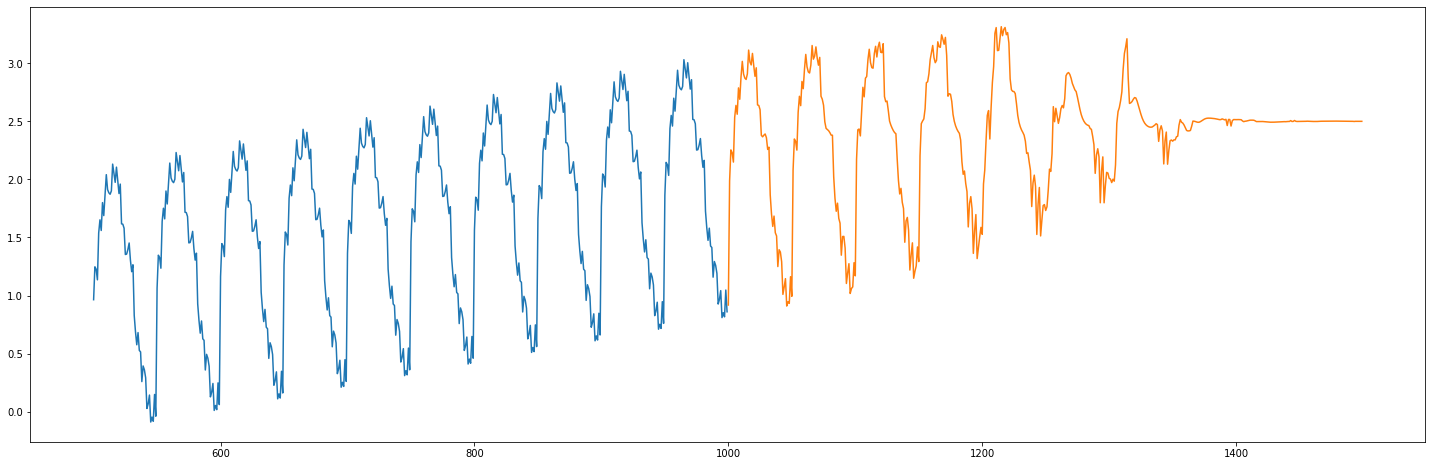

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(yt[500:],X_test[500:])
plt.plot(yu,validation_prediction)